# Lista 3 - Mineração de Dados

In [ ]:
! pip install anaconda
! pip install plotnine
! pip install duckdb
! pip install scikit-learn
! pip install seaborn

## item a) Leitura do Dataset: 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from plotnine import *
from sklearn import preprocessing
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb

In [2]:

arquivo = pd.read_csv('fakeTelegram.BR_2022.csv')
arquivo

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Texto,telegram,NaN,NaN
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Texto,telegram,NaN,NaN
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Texto,telegram,NaN,NaN
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557581,2022-11-11 12:06:15,333e9869f23dbd4682d1be382d9c1e59,e56ec342fc599ebb4ed89655eb6f03aa,25e43b6a58b848c43ad5b5f9e979822a.jpg,url,https://terrabrasilnoticias.com/2022/11/bndes-...,True,True,False,"BNDES tem lucro de R$ 9,6 bilhões no terceiro ...",5,2022-11-16 14:49:39.146502,0.1027,NaN,575796,Url,telegram,NaN,25e43b6a58b848c43ad5b5f9e979822a
557582,2022-11-11 12:09:08,NaN,5b10d7739171149be6d9961e3350c071,657949d03e4088f6b332e2686ccd3221.jpg,url,https://youtu.be/8g1Vz9_0xVk,True,True,False,https://youtu.be/8g1Vz9_0xVk,5,2022-11-16 14:49:39.847434,0.0000,NaN,1286443,Url,telegram,NaN,657949d03e4088f6b332e2686ccd3221
557583,2022-11-11 12:09:47,NaN,1590a03f43b5ba4b6147a1c5e1dd357b,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,"Empresários, demitam os petistas primeiro.\n\n...",5,2022-11-16 14:49:39.922279,0.0000,NaN,13294,Imagem,telegram,NaN,a21848a61045380a6483866daed0ca0e
557584,2022-11-11 12:09:46,NaN,5b10d7739171149be6d9961e3350c071,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,"Empresários, demitam os petistas primeiro.\n\n...",5,2022-11-16 14:49:39.992932,0.0000,NaN,1286444,Imagem,telegram,NaN,a21848a61045380a6483866daed0ca0e


## item b) Removendo trava-zaps: 

In [4]:
#removendo trava-zap
arquivo = arquivo[arquivo['trava_zap'] != 1]

## item c) Removendo linhas duplicadas: 

In [5]:
arquivo = arquivo[arquivo.duplicated() == False]
arquivo.shape

(557570, 19)

## item d) Removendo entradas com textos menores do que 5 palavras: 

In [6]:
#texto com menos de 5 palavra

arquivo = arquivo[arquivo['text_content_anonymous'].str.split(' ').str.len()>=5]
arquivo.shape

(336944, 19)

## item e) Medidas para atributos numéricos: 

### e.1) Tendencia central: 

In [7]:
media_score_sentiment = arquivo['score_sentiment'].mean()
mediana_score_sentiment = arquivo['score_sentiment'].median()
moda_score_sentiment = arquivo['score_sentiment'].mode()

print(f"Média do score de sentimento: {media_score_sentiment:.2f}")
print(f"Mediana do score de sentimento: {mediana_score_sentiment:.2f}")
print(f"Moda do score de sentimento: {moda_score_sentiment[0]:.2f}")



Média do score de sentimento: 0.02
Mediana do score de sentimento: 0.00
Moda do score de sentimento: 0.00


In [8]:
media_score_misinfo = arquivo['score_misinformation'].mean()
mediana_score_misinfo = arquivo['score_misinformation'].median()
moda_score_misinfo = arquivo['score_misinformation'].mode()

print(f"Score Misinformation - Média  : {media_score_misinfo:.2f}")
print(f"Score Misinformation - Mediana: {mediana_score_misinfo:.2f}")
print(f"Score Misinformation - Moda   : {moda_score_misinfo[0]:.2f}")


Score Misinformation - Média  : 0.31
Score Misinformation - Mediana: 0.20
Score Misinformation - Moda   : 0.11


### e.2) Variabilidade: 

In [9]:
std_score_sentiment = arquivo['score_sentiment'].std()
var_score_sentiment = arquivo['score_sentiment'].var()
range_score_sentiment = arquivo['score_sentiment'].max() - arquivo['score_sentiment'].min()

print(f"Score Sentiment       - Desvio Padrão: {std_score_sentiment:.2f}")
print(f"Score Sentiment       - Variância    : {var_score_sentiment:.2f}")
print(f"Score Sentiment       - Amplitude    : {range_score_sentiment:.2f}")

Score Sentiment       - Desvio Padrão: 0.53
Score Sentiment       - Variância    : 0.28
Score Sentiment       - Amplitude    : 2.00


In [10]:
std_score_misinfo = arquivo['score_misinformation'].std()
var_score_misinfo = arquivo['score_misinformation'].var()
range_score_misinfo = arquivo['score_misinformation'].max() - arquivo['score_misinformation'].min()

print(f"Score Misinformation - Desvio Padrão: {std_score_misinfo:.2f}")
print(f"Score Misinformation - Variância    : {var_score_misinfo:.2f}")
print(f"Score Misinformation - Amplitude    : {range_score_misinfo:.2f}")

Score Misinformation - Desvio Padrão: 0.29
Score Misinformation - Variância    : 0.09
Score Misinformation - Amplitude    : 1.00


### e.3) Tabelas e Histogramas:

In [11]:
def hist_plot(df, coluna, titulo):
    plot = (
        ggplot(df, aes(x=coluna)) +
        geom_histogram(bins=10, fill="#69b3a2", color="black", alpha=0.7) +
        labs(title=titulo, x=coluna, y='Frequência') +
        theme_minimal()
    )
    return plot

In [12]:
frequencia_sentiment = pd.cut(arquivo['score_sentiment'], bins=10).value_counts().sort_index()
frequencia_sentiment


score_sentiment
(-1.002, -0.8]     25619
(-0.8, -0.6]       28015
(-0.6, -0.4]       30316
(-0.4, -0.2]       25150
(-0.2, -0.0004]    18427
(-0.0004, 0.2]     87933
(0.2, 0.399]       22792
(0.399, 0.599]     42711
(0.599, 0.799]     26973
(0.799, 0.999]     28960
Name: count, dtype: int64

C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_bin : Removed 48 rows containing non-finite values.


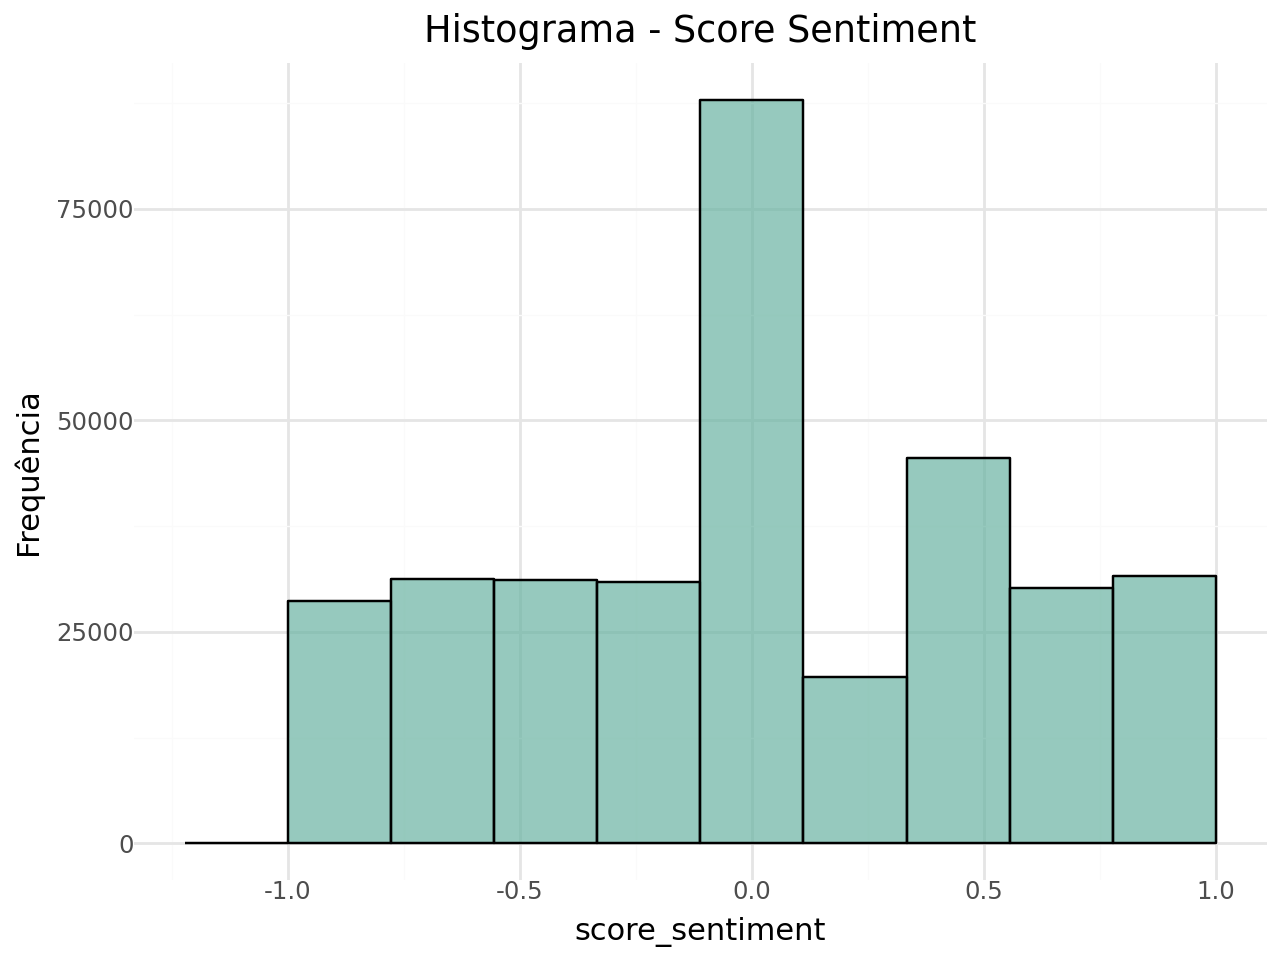

In [13]:
plot_sentiment = hist_plot(arquivo, 'score_sentiment', 'Histograma - Score Sentiment')
plot_sentiment

In [14]:
frequencia_misinfo = pd.cut(arquivo['score_misinformation'], bins=10).value_counts().sort_index()
frequencia_misinfo

score_misinformation
(-0.000997, 0.1]    51140
(0.1, 0.2]          33040
(0.2, 0.3]          19169
(0.3, 0.4]          12834
(0.4, 0.5]          10083
(0.5, 0.6]           8510
(0.6, 0.7]           7656
(0.7, 0.8]           6808
(0.8, 0.9]           6371
(0.9, 1.0]          11575
Name: count, dtype: int64

C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_bin : Removed 169758 rows containing non-finite values.


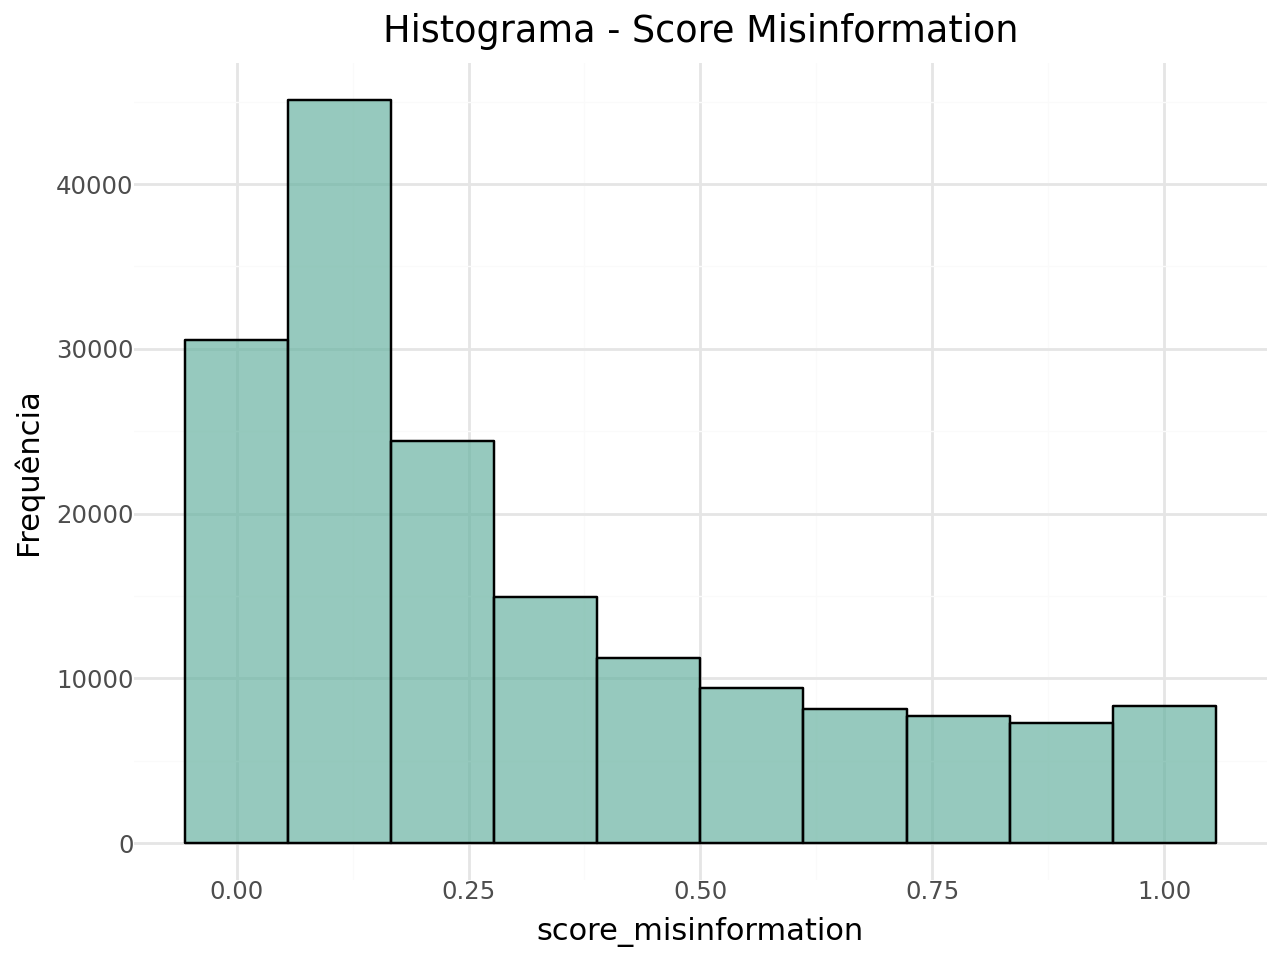

In [15]:
plot_misinfo = hist_plot(arquivo, 'score_misinformation', 'Histograma - Score Misinformation')
plot_misinfo

### e.4) Boxplot:

In [16]:
def boxplot_plot(df, coluna, titulo):
    plot = (
        ggplot(df, aes(x='""', y=coluna)) +  # x vazio para plot vertical
        geom_boxplot(fill="#ffa07a", color="black") +
        labs(title=titulo, x='', y=coluna) +
        theme_minimal()
    )
    return plot

C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 48 rows containing non-finite values.


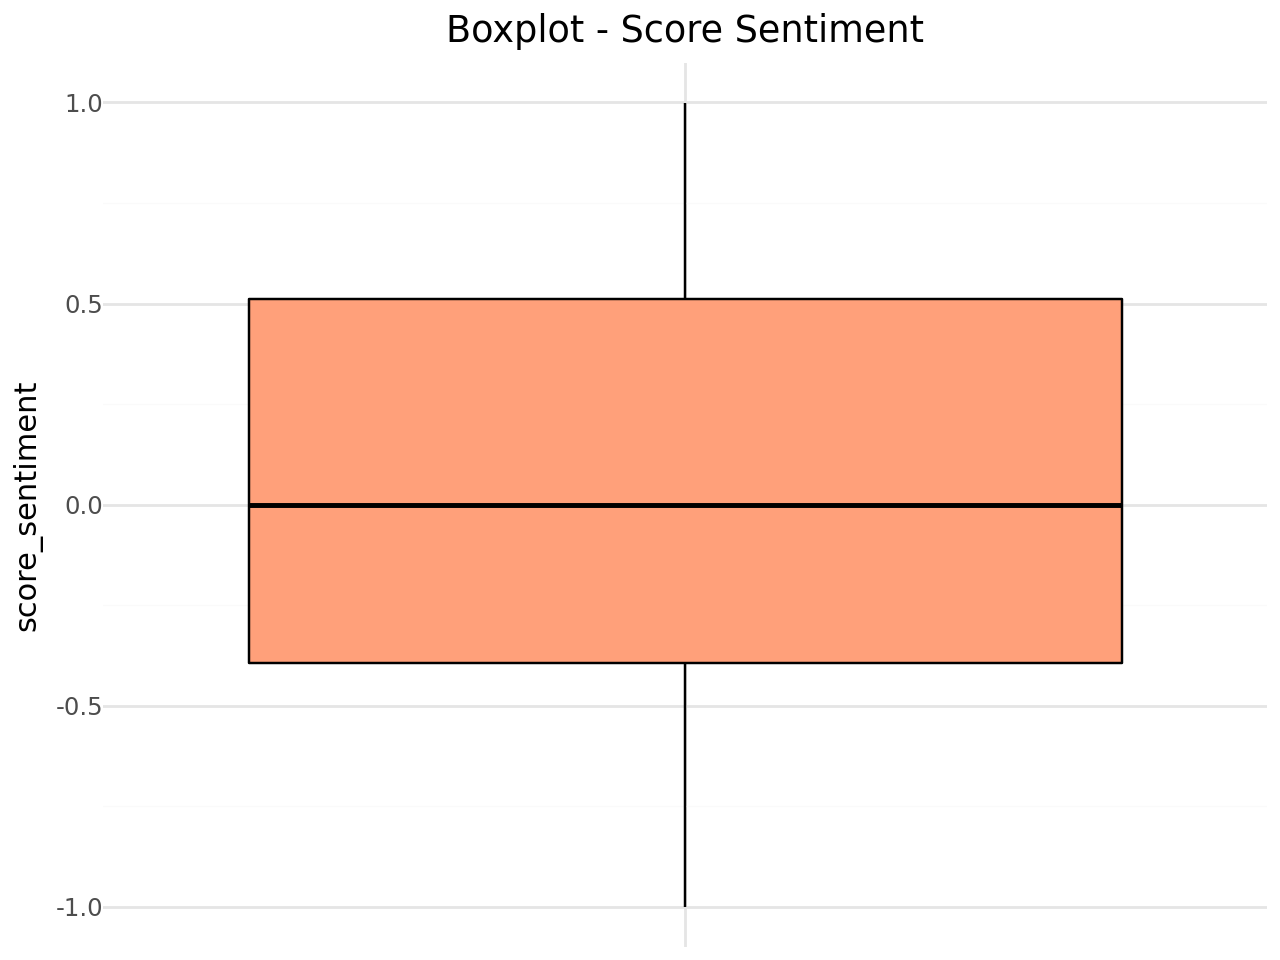

In [17]:
boxplot_sentiment = boxplot_plot(arquivo, 'score_sentiment', 'Boxplot - Score Sentiment')
boxplot_sentiment

C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 169758 rows containing non-finite values.


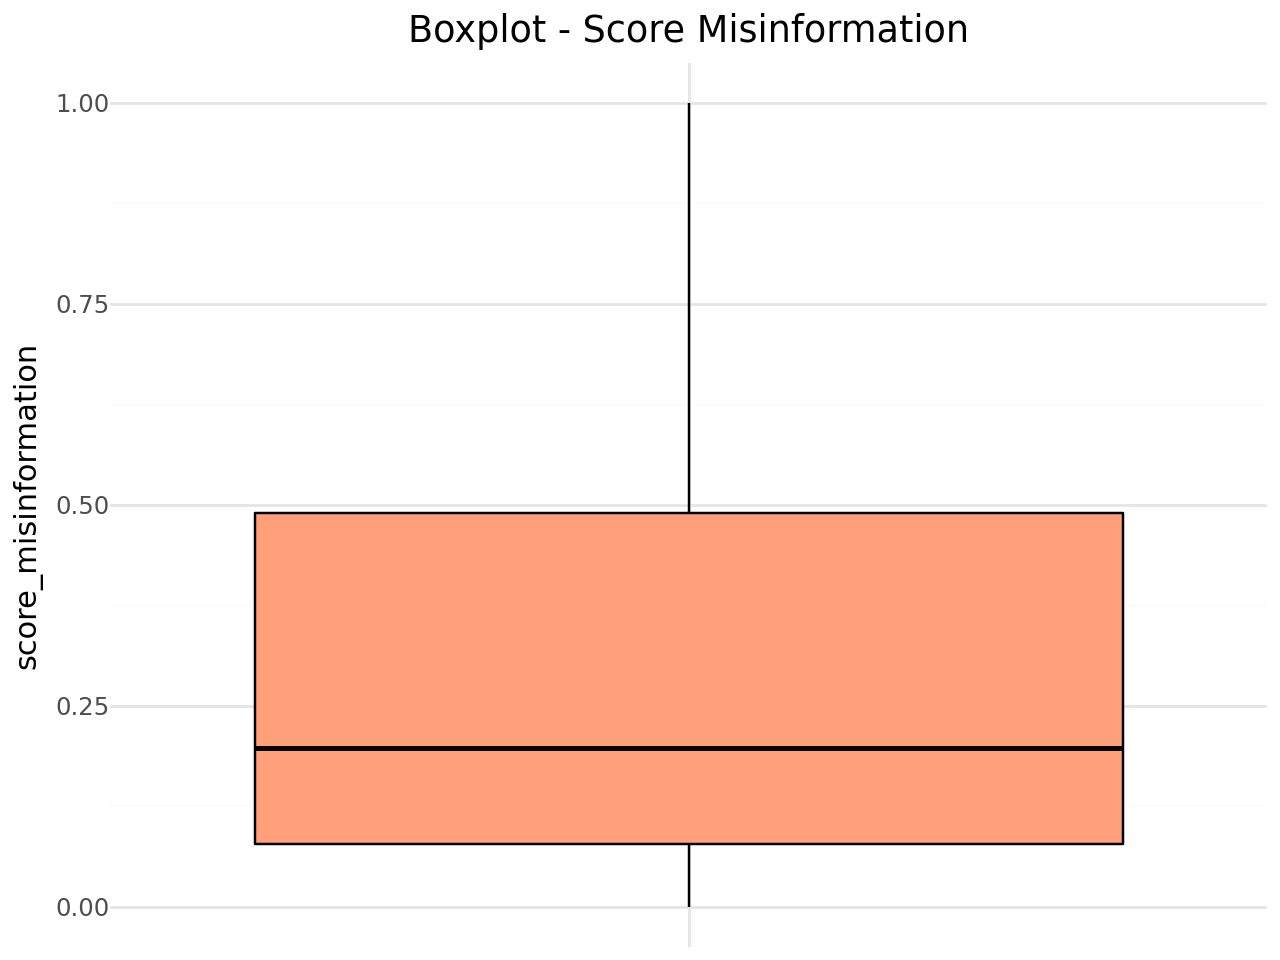

In [18]:
boxplot_misinfo = boxplot_plot(arquivo, 'score_misinformation', 'Boxplot - Score Misinformation')
boxplot_misinfo

### e.5) QQ-Plot: 

In [19]:
def get_qq_data(series):
    series = series.dropna()
    quantis_teoricos = stats.norm.ppf(np.linspace(0.01, 0.99, len(series)))
    quantis_empiricos = np.sort(series.values)
    return pd.DataFrame({'Teorico': quantis_teoricos, 'Empirico': quantis_empiricos})

qq_sentiment_df = get_qq_data(arquivo['score_sentiment'])
qq_misinfo_df = get_qq_data(arquivo['score_misinformation'])



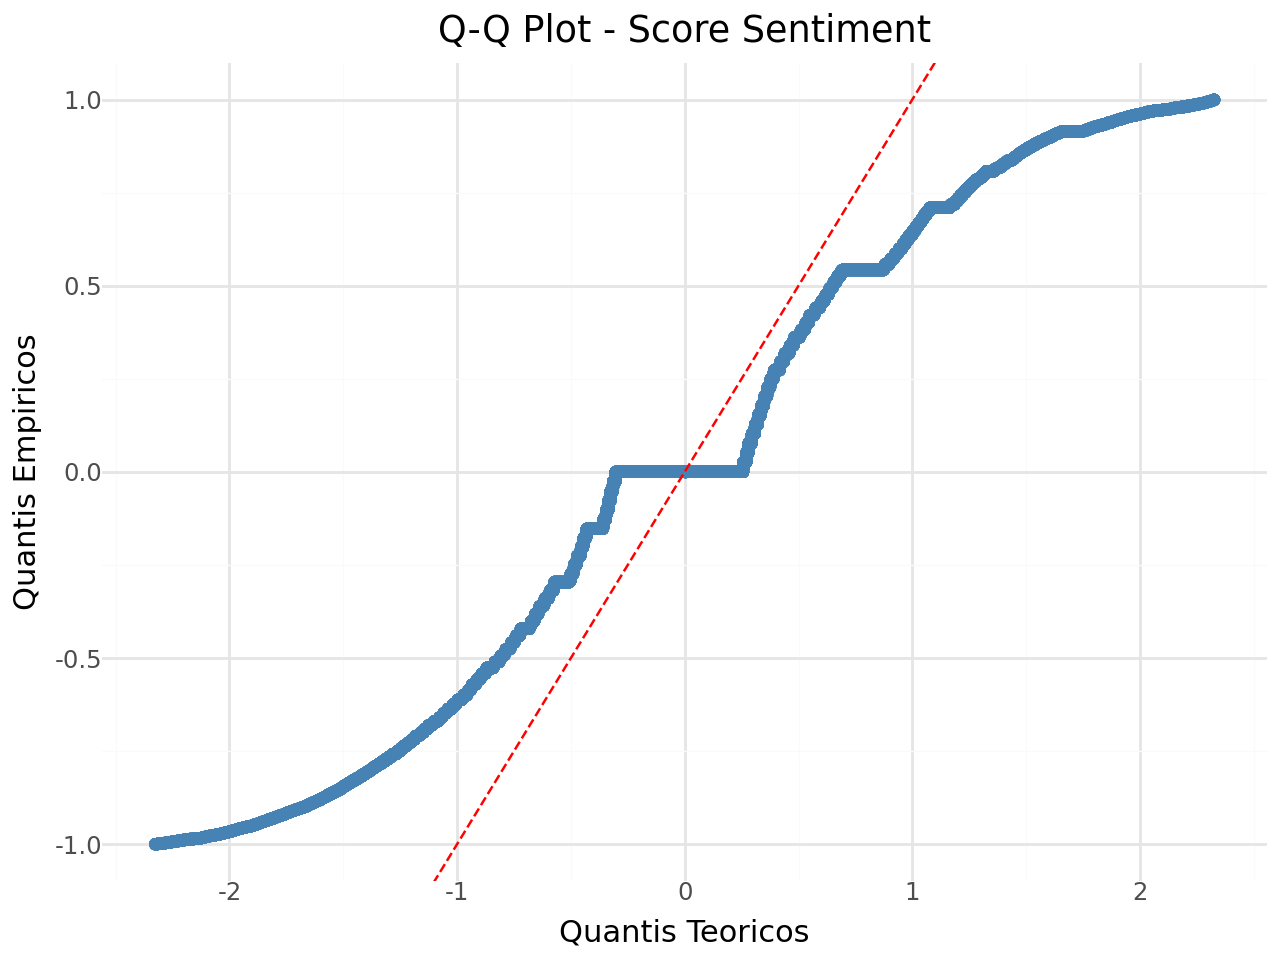

In [20]:
qqplot_sentiment = (
    ggplot(qq_sentiment_df, aes(x='Teorico', y='Empirico')) +
    geom_point(color='steelblue') +
    geom_abline(intercept=0, slope=1, linetype='dashed', color='red') +
    labs(title='Q-Q Plot - Score Sentiment', x='Quantis Teoricos', y='Quantis Empiricos') +
    theme_minimal()
)

qqplot_sentiment

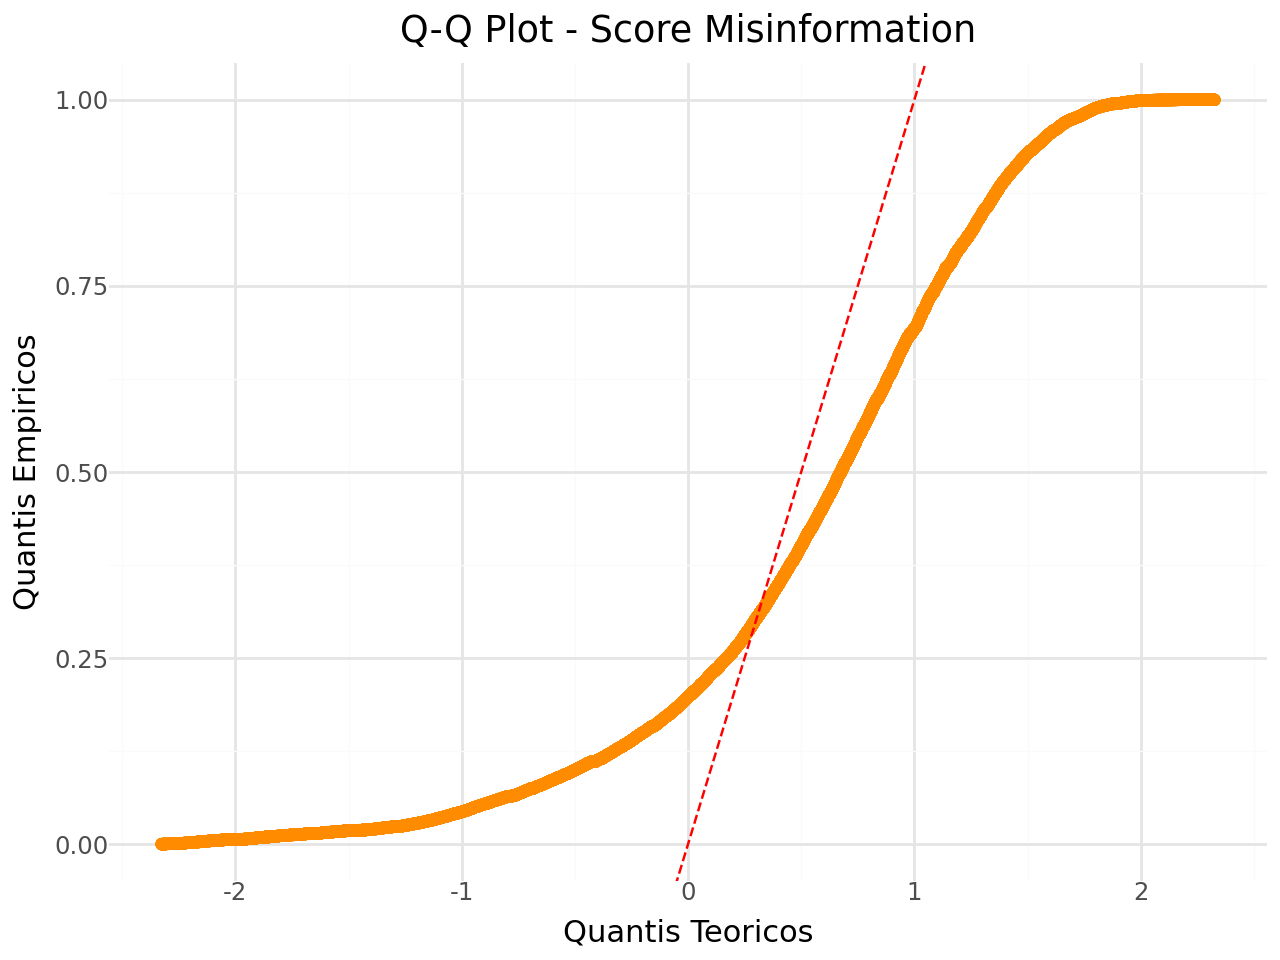

In [21]:
qqplot_misinfo = (
    ggplot(qq_misinfo_df, aes(x='Teorico', y='Empirico')) +
    geom_point(color='darkorange') +
    geom_abline(intercept=0, slope=1, linetype='dashed', color='red') +
    labs(title='Q-Q Plot - Score Misinformation', x='Quantis Teoricos', y='Quantis Empiricos') +
    theme_minimal()
)

qqplot_misinfo

### e.6) Teste de normalidade: 

In [22]:
score_sentiment = arquivo['score_sentiment'].dropna()
score_misinformation = arquivo['score_misinformation'].dropna()
sentiment_z = stats.zscore(score_sentiment)
misinfo_z = stats.zscore(score_misinformation)

ks_sentiment = stats.kstest(sentiment_z, 'norm')
ks_misinfo = stats.kstest(misinfo_z, 'norm')

# Exibir os resultados
print("Kolmogorov-Smirnov - Score Sentiment:")
print(f"  Estatística: {ks_sentiment.statistic}, p-valor: {ks_sentiment.pvalue}")

print("\nKolmogorov-Smirnov - Score Misinformation:")
print(f"  Estatística: {ks_misinfo.statistic}, p-valor: {ks_misinfo.pvalue}")

Kolmogorov-Smirnov - Score Sentiment:
  Estatística: 0.11955561381387086, p-valor: 0.0

Kolmogorov-Smirnov - Score Misinformation:
  Estatística: 0.1556465092975164, p-valor: 0.0


### e.7) Best Fit: 

In [23]:
dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              't',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

def check_distribution(dist_names, y_std):
    
    p_values = []
    distance = []
    D_less_p = []
    
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(stats, distribution)
        param = dist.fit(y_std)

        if distribution != "norm":
            D, p = stats.kstest(y_std, distribution, args=param)
        else:
            D, p = stats.kstest(y_std, distribution,  alternative='greater')
            
        #p = np.around(p, 5)
        p_values.append(p)    
        
        #D = np.around(D, 5)
        distance.append(D)    
        
        if D<p: 
            D_less_p.append("yes") 
        else: 
            D_less_p.append("no")

    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['Distance'] = distance
    results['p_value'] = p_values
    results['D<p'] = D_less_p
    
    results.sort_values(['p_value'], ascending=False, inplace=True)


    print ('\nDistributions sorted by goodness of fit:')
    print ('----------------------------------------')
    print (results)


check_distribution(dist_names, sentiment_z)

C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:6912: RuntimeWarning: invalid value encountered in log



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value D<p
0          beta  0.116231      0.0  no
1         expon  0.245569      0.0  no
2         gamma  0.116837      0.0  no
3       lognorm  0.117614      0.0  no
4          norm  0.119556      0.0  no
5      pearson3  0.130156      0.0  no
6             t  0.119556      0.0  no
7        triang  0.141003      0.0  no
8       uniform  0.121665      0.0  no
9   weibull_min  0.113071      0.0  no
10  weibull_max  0.142185      0.0  no


In [24]:
check_distribution(dist_names, misinfo_z)

C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
C:\Users\iuri_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:6912: RuntimeWarning: invalid value encountered in log



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
2         gamma  0.046656  1.066425e-316  no
5      pearson3  0.046709  2.061097e-317  no
0          beta  0.107219   0.000000e+00  no
1         expon  0.048725   0.000000e+00  no
3       lognorm  0.068527   0.000000e+00  no
4          norm  0.155647   0.000000e+00  no
6             t  0.155647   0.000000e+00  no
7        triang  0.175760   0.000000e+00  no
8       uniform  0.321872   0.000000e+00  no
9   weibull_min  0.047393   0.000000e+00  no
10  weibull_max  0.114705   0.000000e+00  no


## item f) Correlação:

In [25]:
sentiment_to_misinfo = arquivo['score_sentiment'][arquivo['score_misinformation'].notnull()]

In [26]:
spearmanr_corr = stats.spearmanr(sentiment_to_misinfo, score_misinformation)
spearmanr_corr

SignificanceResult(statistic=-0.38851604918922816, pvalue=0.0)

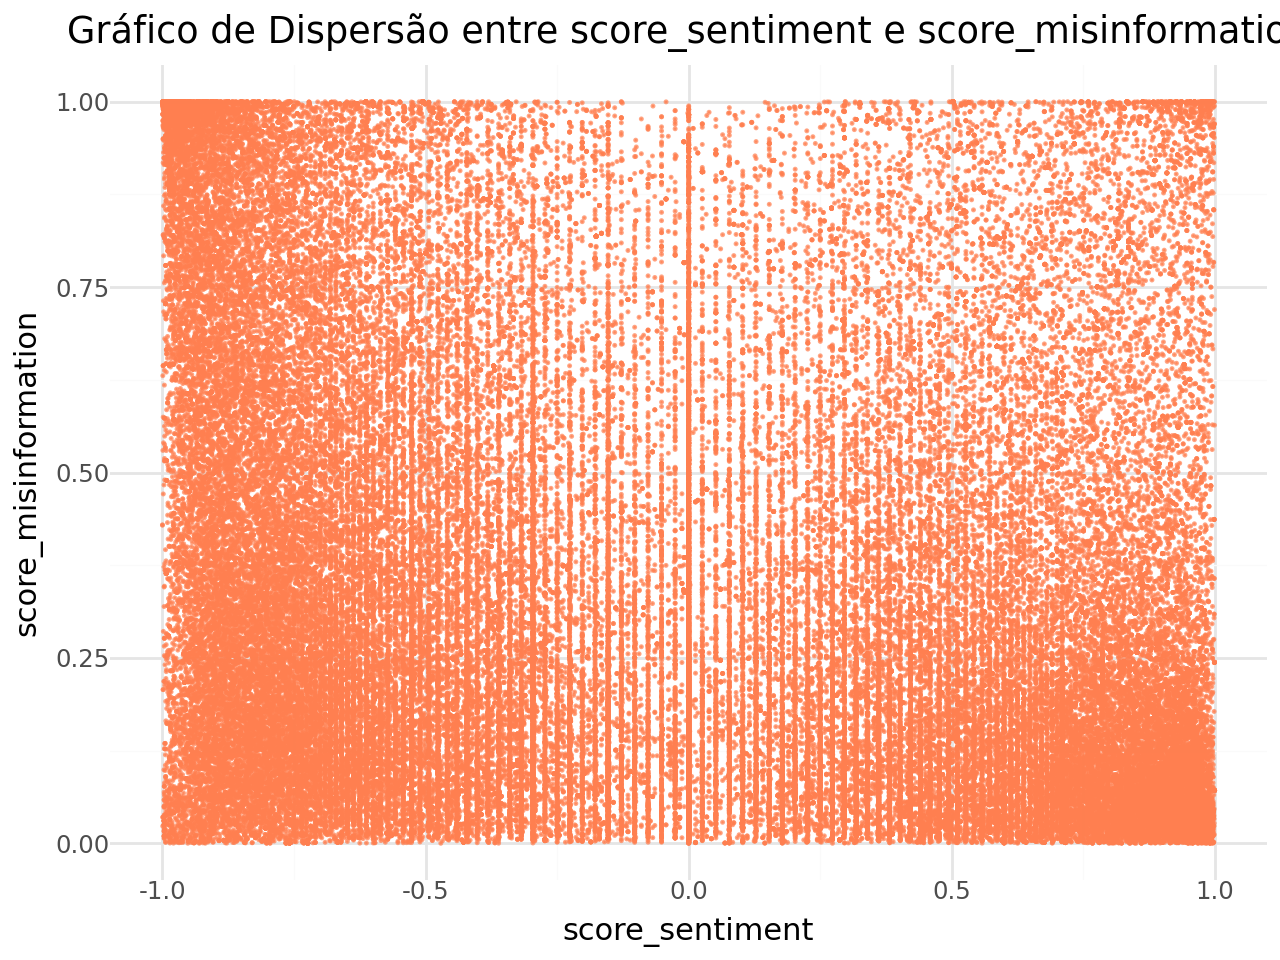

In [27]:
df_plot = pd.DataFrame({'x': sentiment_to_misinfo, 'y': score_misinformation})
(
    ggplot(df_plot, aes(x='sentiment_to_misinfo', y='score_misinformation')) +
    geom_point(color='coral', alpha=0.7, size=0.005) +
    labs(
        title='Gráfico de Dispersão entre score_sentiment e score_misinformation',
        x='score_sentiment',
        y='score_misinformation'
    ) +
    theme_minimal()
)

## item g) V de Cramer: 

In [28]:
data = arquivo[[i for i in arquivo.columns if i in ('media_type', 'has_media', 'has_media_url', 'trava-zap', 'message_type')]]

data.head()

,media_type,has_media,has_media_url,message_type
0,NaN,False,False,Texto
1,NaN,False,False,Texto
2,NaN,False,False,Texto
3,image/jpg,True,False,Imagem
5,NaN,False,False,Texto


In [29]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])

data_encoded.head()

,media_type,has_media,has_media_url,message_type
0,41,0,0,5
1,41,0,0,5
2,41,0,0,5
3,21,1,0,3
4,41,0,0,5


In [30]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [31]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df

,media_type,has_media,has_media_url,message_type
media_type,1.00,1.00,0.47,0.87
has_media,1.00,1.00,0.23,1.00
has_media_url,0.47,0.23,1.00,0.47
message_type,0.87,1.00,0.47,1.00


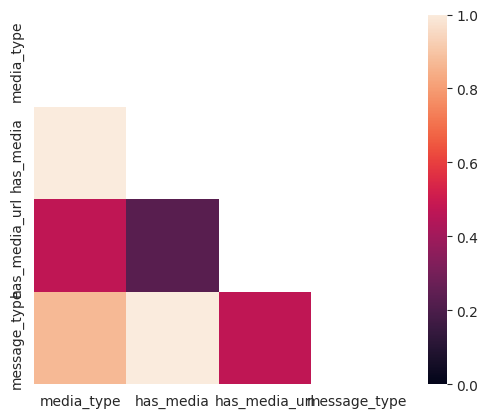

In [32]:
mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()


## item h) Visualizações gerais: 

In [ ]:
#EXPORTANDO PARA PARQUET
arquivo.to_parquet('fakeTelegram3.parquet')

In [36]:
#LENDO O ARQUIVO PARQUET
arquivo = pd.read_parquet('fakeTelegram3.parquet')
arquivo.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,None,None,None,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Texto,telegram,None,None
1,2022-10-05 06:25:08,None,12283e08a2eb5789201e105b34489ee7,None,None,None,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Texto,telegram,None,None
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,None,None,None,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Texto,telegram,None,None
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,None,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Imagem,telegram,None,94dca4cda503100ebfda7ce2bcc060eb
5,2022-10-05 06:28:30,None,b52442a5fbc459ae590dca0d215e32f9,None,None,None,False,False,False,Kķkkkkk to rindo até agora....Quem disse q ia ...,5,2022-10-05 06:29:29.046694,0.7003,0.197813,2735,Texto,telegram,None,None


In [37]:
#EXPORTANDO PARA DUCKDB
conn = duckdb.connect()
conn.register('telegram3', arquivo)

#### h.1) usuarios, mensagens e grupos

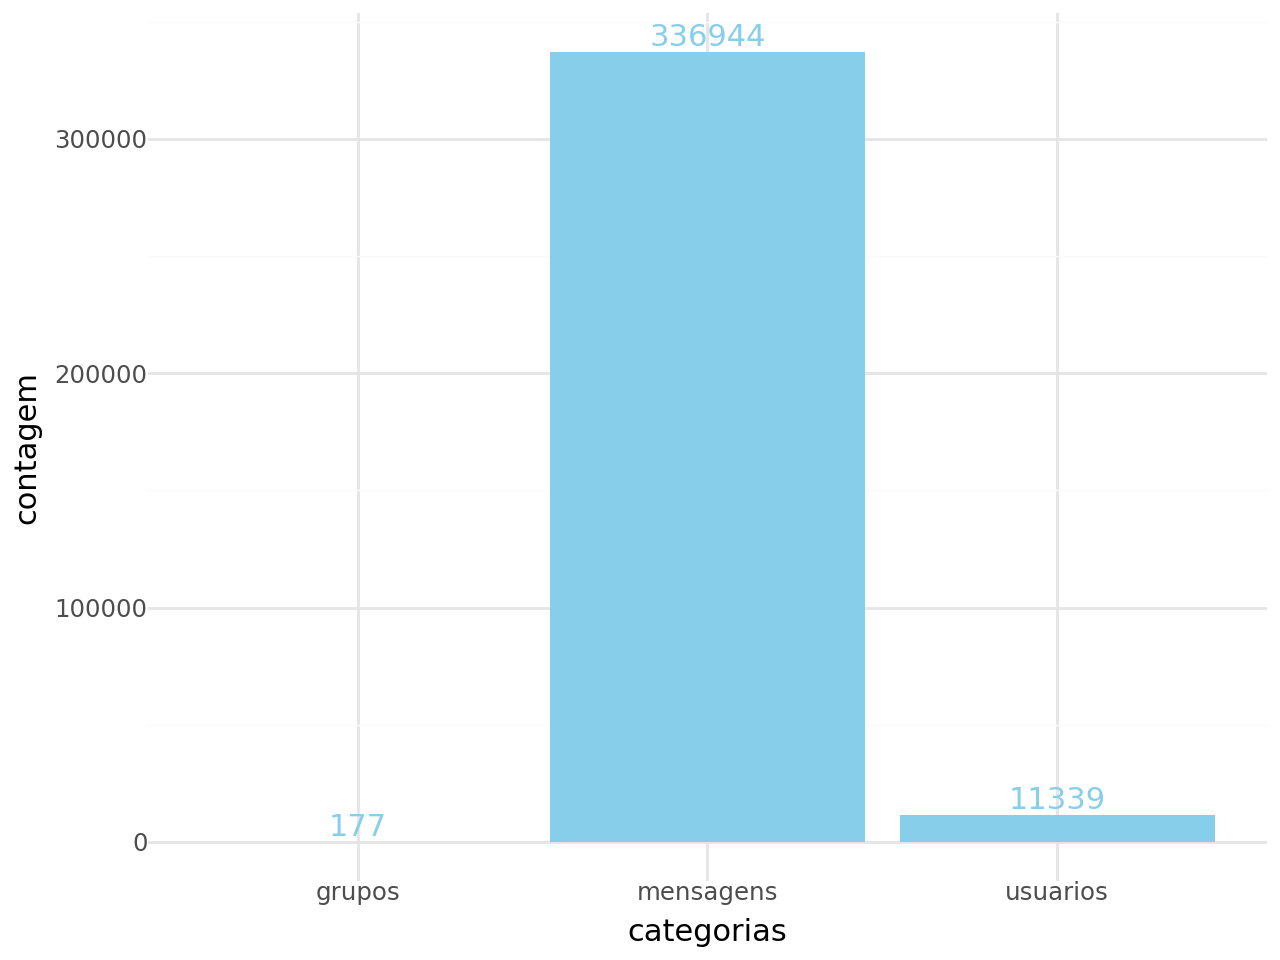

In [38]:
querry1 = conn.execute("""SELECT COUNT(id_message) AS mensagens, COUNT(DISTINCT id_member_anonymous) AS usuarios, COUNT(DISTINCT id_group_anonymous) AS grupos
                         FROM telegram3
                         """).fetchdf()

querry1_melted = pd.melt(querry1, var_name='categorias', value_name='contagem')
plot = (
    ggplot(querry1_melted, aes(x='categorias', y='contagem')) +
    geom_bar(stat='identity', fill= 'skyblue') +
    geom_text(aes(label='contagem'), va='bottom', format_string='{:.0f}', color = 'skyblue') +  # Labels on top
    theme_minimal()
)
plot

#### h.2) Texto X Midia: 

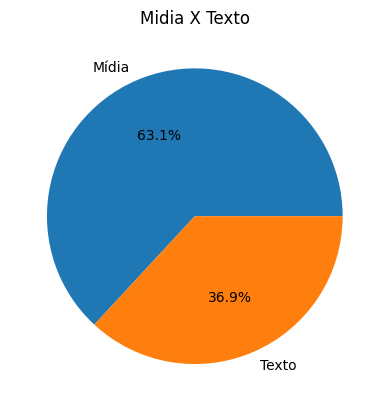

In [53]:
querry2 = conn.execute("""SELECT COUNT(message_type) AS quantidade
                          FROM telegram3
                          WHERE message_type = 'Texto'
                        """).fetchdf()
querry3 = conn.execute("""SELECT COUNT(message_type) AS quantidade
                          FROM telegram3
                          WHERE message_type != 'Texto'
                        """).fetchdf()

querry_united =pd.concat([querry2,querry3], ignore_index= True)
plt.pie(querry_united['quantidade'], labels = ['Mídia','Texto'],autopct='%1.1f%%')
plt.title('Midia X Texto')
plt.show()


#### h.3) Mensagens por tipo de mídia: 

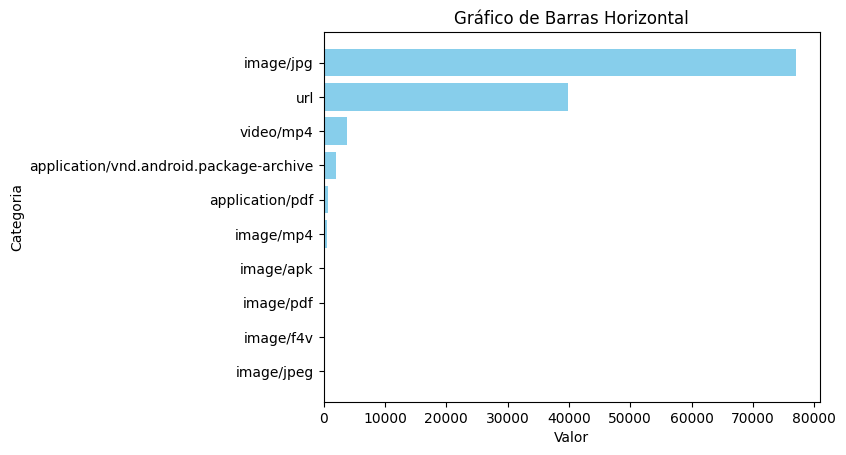

In [57]:
querry4 = conn.execute("""SELECT media_type, COUNT(id_message) AS quantidade
                          FROM telegram3
                          WHERE media_type IS NOT NULL
                          GROUP BY media_type ORDER BY quantidade DESC
                          LIMIT 10
                        """).fetchdf()

querry4 = querry4.sort_values('quantidade', ascending = True)
plt.barh(querry4['media_type'], querry4['quantidade'], color='skyblue')
plt.xlabel('Valor')
plt.ylabel('Categoria')
plt.title('Gráfico de Barras Horizontal')
plt.show()

#### Quantidade de mensagens X quantidade de palavras

In [ ]:
arquivo['words'] = arquivo['text_content_anonymous'].str.split(' ').str.len()
conn.register('telegram3', arquivo)

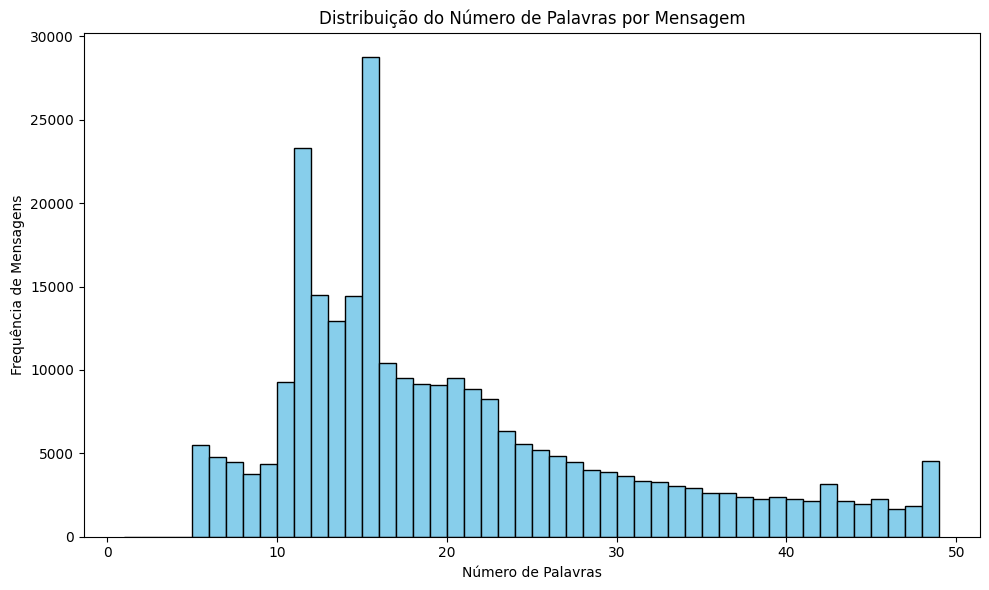

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(arquivo['words'], bins=range(1, 50), color='skyblue', edgecolor='black')
plt.title('Distribuição do Número de Palavras por Mensagem')
plt.xlabel('Número de Palavras')
plt.ylabel('Frequência de Mensagens')
plt.tight_layout()
plt.show()


#### h.10) 30 URL's que mais se repetem:

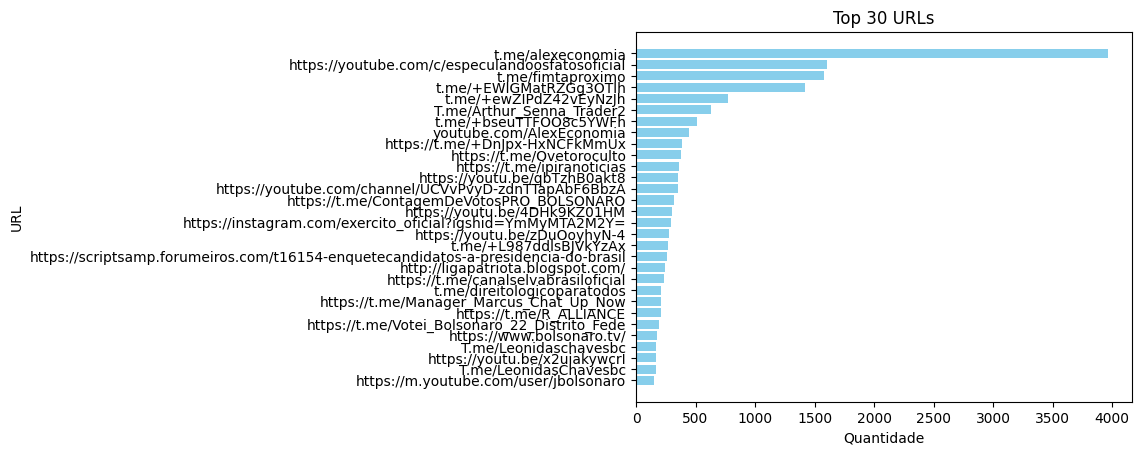

In [70]:
querry5 = conn.execute("""SELECT media_url, COUNT(media_url) AS quantidade
                          FROM telegram3
                          WHERE has_media_url = TRUE
                          GROUP BY media_url ORDER BY quantidade DESC LIMIT 30
                        """).fetchdf()

querry5 = querry5.sort_values('quantidade', ascending = True)
plt.barh(querry5['media_url'], querry5['quantidade'], color='skyblue')
plt.xlabel('Quantidade')
plt.ylabel('URL')
plt.title('Top 30 URLs')
plt.show()


In [67]:
from urllib.parse import urlparse


def extract_domain(url):
    if pd.isna(url):
        return None
    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url  # Add scheme if missing
    parsed = urlparse(url)
    domain = parsed.netloc.lower()
    if domain.startswith('www.'):
        domain = domain[4:]  # Remove www.
    return domain

arquivo['domain'] = arquivo['media_url'].apply(extract_domain)
conn.register('telegram', arquivo)
arquivo[arquivo['domain'].notnull()]

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,...,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5,words,domain
9,2022-10-05 06:29:48,a7e85072244cae15446c9d517dc01a1a,b8a8737812c7fd7d3e0bdbb65ef6306f,None,None,www.marketingdigitalparavencer.com.br,False,True,False,O Deputado Federal pelo NOVO e que foi candida...,...,2022-10-05 06:29:49.901419,-0.8779,0.035876,7248,Texto,telegram,None,None,152,marketingdigitalparavencer.com.br
11,2022-10-05 06:32:21,None,2ff252ad4422e11a6a8abfaa747abb55,None,None,t.me/alexeconomia,False,True,False,Gazprom da Rússia: Retomamos o fornecimento de...,...,2022-10-05 06:32:29.06454,-0.1531,NaN,48922,Texto,telegram,None,None,14,t.me
16,2022-10-05 06:35:42,d49f81df0c75d1d72bee6c5b2d707da0,e3988dfe85b2ba2fa0499a428dd8a20a,None,None,https://youtube.com/c/especulandoosfatosoficial,False,True,False,🚨Olá SEJA bem vindo(a) ..- ao grupo Especuland...,...,2022-10-05 06:35:49.661204,0.8074,0.018574,451729,Texto,telegram,None,None,42,youtube.com
38,2022-10-05 06:56:01,None,0e899038fbe9196d404c90cf7ad282e0,None,None,http://lulaflix.com.br,False,True,False,PT recorre ao TSE para tirar do ar site “LulaF...,...,2022-10-05 06:56:30.615304,0.4710,0.629701,5759,Texto,telegram,None,None,47,lulaflix.com.br
43,2022-10-05 07:00:45,a7e85072244cae15446c9d517dc01a1a,b8a8737812c7fd7d3e0bdbb65ef6306f,None,None,www.marketingdigitalparavencer.com.br,False,True,False,O Exército do Bem continua crescendo para venc...,...,2022-10-05 07:00:46.306885,-0.9313,0.484808,7249,Texto,telegram,None,None,166,marketingdigitalparavencer.com.br
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557580,2022-11-11 12:05:41,3e49fd40fd973ee1b8f1a6d58feb4a54,4c6519d965020abc048521dfa837b9bb,9dd3b338a07226a04f97df82fbbcb36b.jpg,image/jpg,https://t.me/Manager_Marcus_Chat_Up_Now,True,True,False,NOVOS MEMBROS SEMPRE CLICAM NO LINK DO ADMINIS...,...,2022-11-11 12:06:13.208171,NaN,NaN,93464,Imagem,telegram,None,9dd3b338a07226a04f97df82fbbcb36b,26,t.me
557581,2022-11-11 12:06:15,333e9869f23dbd4682d1be382d9c1e59,e56ec342fc599ebb4ed89655eb6f03aa,25e43b6a58b848c43ad5b5f9e979822a.jpg,url,https://terrabrasilnoticias.com/2022/11/bndes-...,True,True,False,"BNDES tem lucro de R$ 9,6 bilhões no terceiro ...",...,2022-11-16 14:49:39.146502,0.1027,NaN,575796,Url,telegram,None,25e43b6a58b848c43ad5b5f9e979822a,12,terrabrasilnoticias.com
557583,2022-11-11 12:09:47,None,1590a03f43b5ba4b6147a1c5e1dd357b,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,"Empresários, demitam os petistas primeiro.\n\n...",...,2022-11-16 14:49:39.922279,0.0000,NaN,13294,Imagem,telegram,None,a21848a61045380a6483866daed0ca0e,5,t.me
557584,2022-11-11 12:09:46,None,5b10d7739171149be6d9961e3350c071,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,"Empresários, demitam os petistas primeiro.\n\n...",...,2022-11-16 14:49:39.992932,0.0000,NaN,1286444,Imagem,telegram,None,a21848a61045380a6483866daed0ca0e,5,t.me


In [ ]:
querry6 = conn.execute("""SELECT domain, COUNT(domain) AS quantidade
                          FROM telegram
                          WHERE has_media_url = TRUE
                          GROUP BY domain ORDER BY quantidade DESC LIMIT 30
                        """).fetchdf()

querry6 = querry6.sort_values('quantidade', ascending = True)
plt.barh(querry6['domain'], querry6['quantidade'], color='skyblue')
plt.xlabel('Quantidade')
plt.ylabel('URL')
plt.title('Top 30 URLs')
plt.show()

,domain,quantidade
0,t.me,18493
1,youtu.be,12725
2,youtube.com,7246
3,terrabrasilnoticias.com,6371
4,jornaldacidadeonline.com.br,4367
5,instagram.com,1657
6,pleno.news,1312
7,twitter.com,1148
8,aliadosbrasiloficial.com.br,916
9,verdadecensurada.com.br,789
